In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
noisy_imgs_path = '/content/gdrive/My Drive/Colab Notebooks/Data/Noisy_Documents/noisy/'
clean_imgs_path = '/content/gdrive/My Drive/Colab Notebooks/Data/Noisy_Documents/clean/'

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

X_train_noisy = []

for file in sorted(os.listdir(noisy_imgs_path)):
    img = load_img(noisy_imgs_path+file, color_mode='grayscale',
                  target_size=(420,540))
    img = img_to_array(img).astype('float32')/255
    X_train_noisy.append(img)
    
# convert to numpy array
X_train_noisy = np.array(X_train_noisy)

In [ ]:
print(X_train_noisy.shape)

(216, 420, 540, 1)


In [ ]:
X_train_clean = []

for file in sorted(os.listdir(clean_imgs_path)):
  img = load_img(clean_imgs_path+file, color_mode='grayscale',
                  target_size=(420,540))
  img = img_to_array(img).astype('float32')/255
  X_train_clean.append(img)

# convert to numpy array
X_train_clean = np.array(X_train_clean)

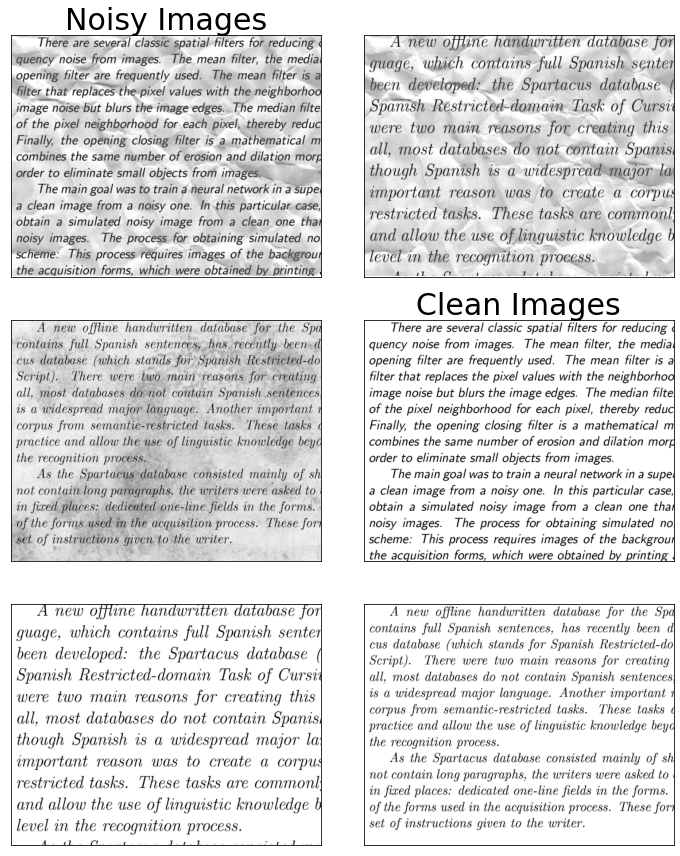

In [ ]:
import random
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4),
      (ax5,ax6)) = plt.subplots(3, 2, figsize=(10,12))

randomly_selected_imgs = random.sample(range(X_train_noisy.shape[0]),3)

# plot noisy images on the left
for i, ax in enumerate([ax1,ax2,ax3]):
  ax.imshow(X_train_noisy[i].reshape(420,540), cmap='gray')
  if i == 0:
    ax.set_title("Noisy Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# plot clean images on the right
for i, ax in enumerate([ax4,ax5,ax6]):
  ax.imshow(X_train_clean[i].reshape(420,540), cmap='gray')
  if i == 0:
    ax.set_title("Clean Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
# use the first 20 noisy images as testing images
X_test_noisy = X_train_noisy[0:20,]
X_train_noisy = X_train_noisy[21:,]

# use the first 20 clean images as testing images
X_test_clean = X_train_clean[0:20,]
X_train_clean = X_train_clean[21:,]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D

conv_autoencoder = Sequential()
# encoder
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3),
                            activation='relu', padding='same',
                            input_shape=(420,540,1)))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3),
                            activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3),
                            activation='relu', padding='same'))
# decoder
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3),
                            activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3),
                            activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3),
                            activation='relu', padding='same'))
# output layer
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3),
                            activation='sigmoid', padding='same'))

conv_autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 420, 540, 32)      320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 420, 540, 16)      4624      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 420, 540, 8)       1160      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 420, 540, 16)      1168      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 420, 540, 32)      4640      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 420, 540, 1)      

In [ ]:
conv_autoencoder.compile(optimizer='adam', 
                         loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

Epoch 1/10
195/195 [==============================] - 10s 51ms/step - loss: 0.6882
Epoch 2/10
195/195 [==============================] - 5s 26ms/step - loss: 0.5654
Epoch 3/10
195/195 [==============================] - 5s 26ms/step - loss: 0.3373
Epoch 4/10
195/195 [==============================] - 5s 26ms/step - loss: 0.3176
Epoch 5/10
195/195 [==============================] - 5s 26ms/step - loss: 0.3045
Epoch 6/10
195/195 [==============================] - 5s 26ms/step - loss: 0.2770
Epoch 7/10
195/195 [==============================] - 5s 26ms/step - loss: 0.2465
Epoch 8/10
195/195 [==============================] - 5s 26ms/step - loss: 0.2073
Epoch 9/10
195/195 [==============================] - 5s 26ms/step - loss: 0.1668
Epoch 10/10
195/195 [==============================] - 5s 26ms/step - loss: 0.1535


In [ ]:
output = conv_autoencoder.predict(X_test_noisy)

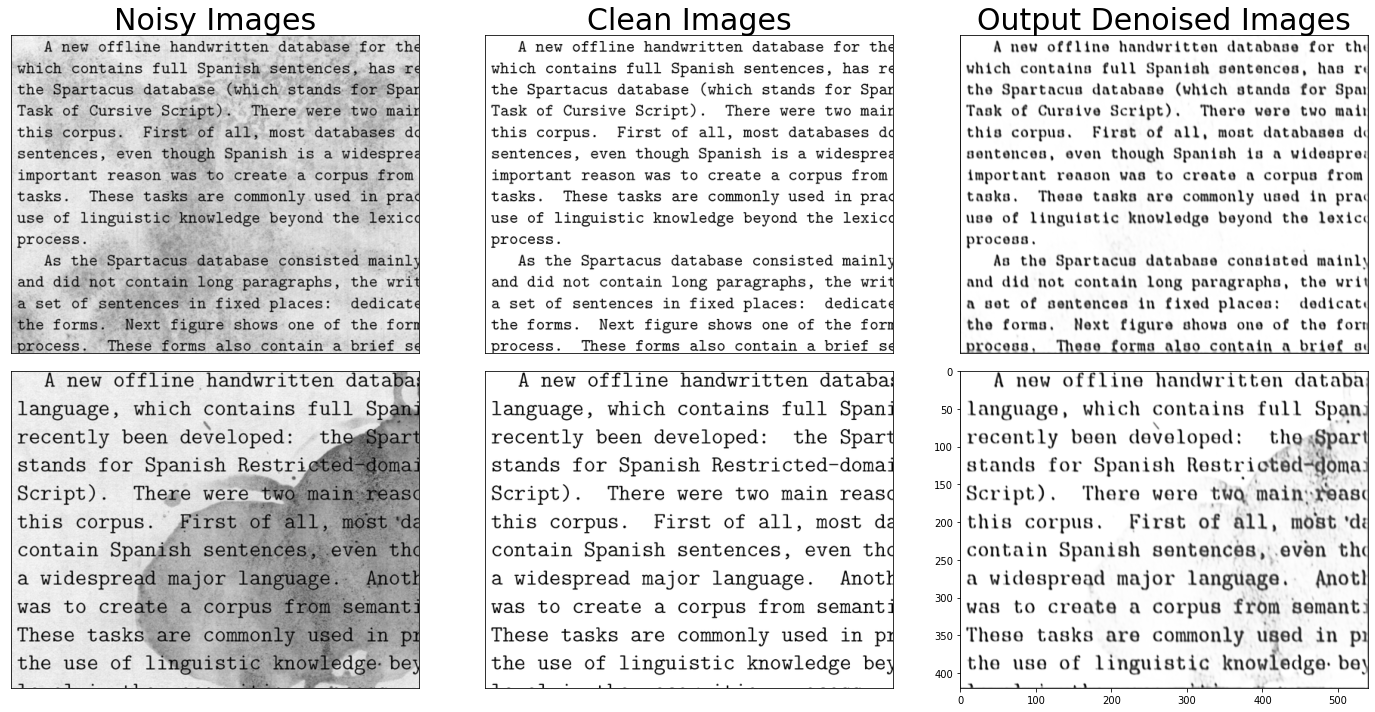

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))

randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)

for i, ax in enumerate([ax1, ax4]):
  idx = randomly_selected_imgs[i]
  ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
  if i == 0:
    ax.set_title("Noisy Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
  idx = randomly_selected_imgs[i]
  ax.imshow(X_test_clean[idx].reshape(420,540), cmap='gray')
  if i == 0:
    ax.set_title("Clean Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
  idx = randomly_selected_imgs[i]
  ax.imshow(output[idx].reshape(420,540), cmap='gray')
  if i == 0:
    ax.set_title("Output Denoised Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()